In [5]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [6]:
with open('./results/nopricechange/7-9/traderIDs_500_7200_100_5_10.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

In [7]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_500_7200_100_5_10.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_500_7200_100_5_10.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_500_7200_100_5_10.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,1,993,yshfc,1,-1.0
1,2,993,yshfc,2,-2.0
2,10,993,yshfc,10,1.0
3,11,993,yshfc,11,1.0
4,13,993,yshfc,13,-1.0
...,...,...,...,...,...
3836251,7,8192,xbcot,35,1.0
3836252,9,8192,xbcot,42,1.0
3836253,2,8192,jmeyl,76,1.0
3836254,3,8192,jmeyl,43,-1.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [11]:
len(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192])

2217038

In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades22_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2217038
Cascade length:  30769
New Orders left:  2186269
making new cascade


OG Orders left:  2186269
Cascade length:  18190
New Orders left:  2168079
making new cascade


OG Orders left:  2168079
Cascade length:  20342
New Orders left:  2147737
making new cascade


OG Orders left:  2147737
Cascade length:  14429
New Orders left:  2133308
making new cascade


OG Orders left:  2133308
Cascade length:  16219
New Orders left:  2117089
making new cascade


OG Orders left:  2117089
Cascade length:  3099
New Orders left:  2113990
making new cascade


OG Orders left:  2113990
Cascade length:  7267
New Orders left:  2106723
making new cascade


OG Orders left:  2106723
Cascade length:  5967
New Orders left:  2100756
making new cascade


OG Orders left:  2100756
Cascade length:  14627
New Orders left:  2086129
making new cascade


OG Orders left:  2086129
Cascade length:  7161
New Orders left:  2078968
making new cascade


OG Orders left:  2078968
Cascade length:  5688
New Ord

Cascade length:  4319
New Orders left:  1740897
making new cascade


OG Orders left:  1740897
Cascade length:  5199
New Orders left:  1735698
making new cascade


OG Orders left:  1735698
Cascade length:  4463
New Orders left:  1731235
making new cascade


OG Orders left:  1731235
Cascade length:  3603
New Orders left:  1727632
making new cascade


OG Orders left:  1727632
Cascade length:  2838
New Orders left:  1724794
making new cascade


OG Orders left:  1724794
Cascade length:  6155
New Orders left:  1718639
making new cascade


OG Orders left:  1718639
Cascade length:  3265
New Orders left:  1715374
making new cascade


OG Orders left:  1715374
Cascade length:  9646
New Orders left:  1705728
making new cascade


OG Orders left:  1705728
Cascade length:  2189
New Orders left:  1703539
making new cascade


OG Orders left:  1703539
Cascade length:  7786
New Orders left:  1695753
making new cascade


OG Orders left:  1695753
Cascade length:  12881
New Orders left:  1682872
making new 

Cascade length:  2627
New Orders left:  1398420
making new cascade


OG Orders left:  1398420
Cascade length:  2692
New Orders left:  1395728
making new cascade


OG Orders left:  1395728
Cascade length:  3795
New Orders left:  1391933
making new cascade


OG Orders left:  1391933
Cascade length:  3107
New Orders left:  1388826
making new cascade


OG Orders left:  1388826
Cascade length:  3030
New Orders left:  1385796
making new cascade


OG Orders left:  1385796
Cascade length:  4403
New Orders left:  1381393
making new cascade


OG Orders left:  1381393
Cascade length:  4246
New Orders left:  1377147
making new cascade


OG Orders left:  1377147
Cascade length:  3053
New Orders left:  1374094
making new cascade


OG Orders left:  1374094
Cascade length:  6367
New Orders left:  1367727
making new cascade


OG Orders left:  1367727
Cascade length:  6120
New Orders left:  1361607
making new cascade


OG Orders left:  1361607
Cascade length:  3347
New Orders left:  1358260
making new c

Cascade length:  2116
New Orders left:  1097428
making new cascade


OG Orders left:  1097428
Cascade length:  2885
New Orders left:  1094543
making new cascade


OG Orders left:  1094543
Cascade length:  2155
New Orders left:  1092388
making new cascade


OG Orders left:  1092388
Cascade length:  1955
New Orders left:  1090433
making new cascade


OG Orders left:  1090433
Cascade length:  2565
New Orders left:  1087868
making new cascade


OG Orders left:  1087868
Cascade length:  2121
New Orders left:  1085747
making new cascade


OG Orders left:  1085747
Cascade length:  2966
New Orders left:  1082781
making new cascade


OG Orders left:  1082781
Cascade length:  2612
New Orders left:  1080169
making new cascade


OG Orders left:  1080169
Cascade length:  1345
New Orders left:  1078824
making new cascade


OG Orders left:  1078824
Cascade length:  5191
New Orders left:  1073633
making new cascade


OG Orders left:  1073633
Cascade length:  2722
New Orders left:  1070911
making new c

Cascade length:  2534
New Orders left:  800408
making new cascade


OG Orders left:  800408
Cascade length:  13550
New Orders left:  786858
making new cascade


OG Orders left:  786858
Cascade length:  5417
New Orders left:  781441
making new cascade


OG Orders left:  781441
Cascade length:  3133
New Orders left:  778308
making new cascade


OG Orders left:  778308
Cascade length:  4225
New Orders left:  774083
making new cascade


OG Orders left:  774083
Cascade length:  4304
New Orders left:  769779
making new cascade


OG Orders left:  769779
Cascade length:  7226
New Orders left:  762553
making new cascade


OG Orders left:  762553
Cascade length:  4116
New Orders left:  758437
making new cascade


OG Orders left:  758437
Cascade length:  2654
New Orders left:  755783
making new cascade


OG Orders left:  755783
Cascade length:  3236
New Orders left:  752547
making new cascade


OG Orders left:  752547
Cascade length:  2652
New Orders left:  749895
making new cascade


OG Orders l

Cascade length:  2729
New Orders left:  427173
making new cascade


OG Orders left:  427173
Cascade length:  2540
New Orders left:  424633
making new cascade


OG Orders left:  424633
Cascade length:  2684
New Orders left:  421949
making new cascade


OG Orders left:  421949
Cascade length:  8278
New Orders left:  413671
making new cascade


OG Orders left:  413671
Cascade length:  3395
New Orders left:  410276
making new cascade


OG Orders left:  410276
Cascade length:  5788
New Orders left:  404488
making new cascade


OG Orders left:  404488
Cascade length:  2545
New Orders left:  401943
making new cascade


OG Orders left:  401943
Cascade length:  3237
New Orders left:  398706
making new cascade


OG Orders left:  398706
Cascade length:  118
New Orders left:  398588
making new cascade


OG Orders left:  398588
Cascade length:  2077
New Orders left:  396511
making new cascade


OG Orders left:  396511
Cascade length:  3151
New Orders left:  393360
making new cascade


OG Orders lef

Cascade length:  2023
New Orders left:  158874
making new cascade


OG Orders left:  158874
Cascade length:  3863
New Orders left:  155011
making new cascade


OG Orders left:  155011
Cascade length:  2692
New Orders left:  152319
making new cascade


OG Orders left:  152319
Cascade length:  2680
New Orders left:  149639
making new cascade


OG Orders left:  149639
Cascade length:  2325
New Orders left:  147314
making new cascade


OG Orders left:  147314
Cascade length:  2846
New Orders left:  144468
making new cascade


OG Orders left:  144468
Cascade length:  2319
New Orders left:  142149
making new cascade


OG Orders left:  142149
Cascade length:  2570
New Orders left:  139579
making new cascade


OG Orders left:  139579
Cascade length:  4058
New Orders left:  135521
making new cascade


OG Orders left:  135521
Cascade length:  4732
New Orders left:  130789
making new cascade


OG Orders left:  130789
Cascade length:  2459
New Orders left:  128330
making new cascade


OG Orders le

In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades21_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2856341


In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades12_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2856341


In [8]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades11_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2856341
Cascade length:  3525
New Orders left:  2852816
making new cascade


OG Orders left:  2852816
Cascade length:  3621
New Orders left:  2849195
making new cascade


OG Orders left:  2849195
Cascade length:  3256
New Orders left:  2845939
making new cascade


OG Orders left:  2845939
Cascade length:  1
New Orders left:  2845938
making new cascade


OG Orders left:  2845938
Cascade length:  3680
New Orders left:  2842258
making new cascade


OG Orders left:  2842258
Cascade length:  1
New Orders left:  2842257
making new cascade


OG Orders left:  2842257
Cascade length:  3720
New Orders left:  2838537
making new cascade


OG Orders left:  2838537
Cascade length:  3866
New Orders left:  2834671
making new cascade


OG Orders left:  2834671
Cascade length:  2
New Orders left:  2834669
making new cascade


OG Orders left:  2834669
Cascade length:  3713
New Orders left:  2830956
making new cascade


OG Orders left:  2830956
Cascade length:  1
New Orders left:  2830955

Cascade length:  12
New Orders left:  2700147
making new cascade


OG Orders left:  2700147
Cascade length:  3886
New Orders left:  2696261
making new cascade


OG Orders left:  2696261
Cascade length:  3543
New Orders left:  2692718
making new cascade


OG Orders left:  2692718
Cascade length:  15
New Orders left:  2692703
making new cascade


OG Orders left:  2692703
Cascade length:  13
New Orders left:  2692690
making new cascade


OG Orders left:  2692690
Cascade length:  3423
New Orders left:  2689267
making new cascade


OG Orders left:  2689267
Cascade length:  15
New Orders left:  2689252
making new cascade


OG Orders left:  2689252
Cascade length:  2632
New Orders left:  2686620
making new cascade


OG Orders left:  2686620
Cascade length:  3265
New Orders left:  2683355
making new cascade


OG Orders left:  2683355
Cascade length:  3037
New Orders left:  2680318
making new cascade


OG Orders left:  2680318
Cascade length:  1
New Orders left:  2680317
making new cascade


OG

Cascade length:  31
New Orders left:  2556939
making new cascade


OG Orders left:  2556939
Cascade length:  2125
New Orders left:  2554814
making new cascade


OG Orders left:  2554814
Cascade length:  2192
New Orders left:  2552622
making new cascade


OG Orders left:  2552622
Cascade length:  14
New Orders left:  2552608
making new cascade


OG Orders left:  2552608
Cascade length:  2239
New Orders left:  2550369
making new cascade


OG Orders left:  2550369
Cascade length:  1
New Orders left:  2550368
making new cascade


OG Orders left:  2550368
Cascade length:  1780
New Orders left:  2548588
making new cascade


OG Orders left:  2548588
Cascade length:  1905
New Orders left:  2546683
making new cascade


OG Orders left:  2546683
Cascade length:  19
New Orders left:  2546664
making new cascade


OG Orders left:  2546664
Cascade length:  50
New Orders left:  2546614
making new cascade


OG Orders left:  2546614
Cascade length:  1949
New Orders left:  2544665
making new cascade


OG

Cascade length:  27
New Orders left:  2497361
making new cascade


OG Orders left:  2497361
Cascade length:  761
New Orders left:  2496600
making new cascade


OG Orders left:  2496600
Cascade length:  58
New Orders left:  2496542
making new cascade


OG Orders left:  2496542
Cascade length:  20
New Orders left:  2496522
making new cascade


OG Orders left:  2496522
Cascade length:  927
New Orders left:  2495595
making new cascade


OG Orders left:  2495595
Cascade length:  3
New Orders left:  2495592
making new cascade


OG Orders left:  2495592
Cascade length:  3
New Orders left:  2495589
making new cascade


OG Orders left:  2495589
Cascade length:  1277
New Orders left:  2494312
making new cascade


OG Orders left:  2494312
Cascade length:  1519
New Orders left:  2492793
making new cascade


OG Orders left:  2492793
Cascade length:  2
New Orders left:  2492791
making new cascade


OG Orders left:  2492791
Cascade length:  3
New Orders left:  2492788
making new cascade


OG Orders l

Cascade length:  1429
New Orders left:  2451149
making new cascade


OG Orders left:  2451149
Cascade length:  1748
New Orders left:  2449401
making new cascade


OG Orders left:  2449401
Cascade length:  51
New Orders left:  2449350
making new cascade


OG Orders left:  2449350
Cascade length:  1582
New Orders left:  2447768
making new cascade


OG Orders left:  2447768
Cascade length:  1
New Orders left:  2447767
making new cascade


OG Orders left:  2447767
Cascade length:  4
New Orders left:  2447763
making new cascade


OG Orders left:  2447763
Cascade length:  1701
New Orders left:  2446062
making new cascade


OG Orders left:  2446062
Cascade length:  1345
New Orders left:  2444717
making new cascade


OG Orders left:  2444717
Cascade length:  3
New Orders left:  2444714
making new cascade


OG Orders left:  2444714
Cascade length:  32
New Orders left:  2444682
making new cascade


OG Orders left:  2444682
Cascade length:  61
New Orders left:  2444621
making new cascade


OG Ord

Cascade length:  1440
New Orders left:  2408478
making new cascade


OG Orders left:  2408478
Cascade length:  1
New Orders left:  2408477
making new cascade


OG Orders left:  2408477
Cascade length:  3
New Orders left:  2408474
making new cascade


OG Orders left:  2408474
Cascade length:  2
New Orders left:  2408472
making new cascade


OG Orders left:  2408472
Cascade length:  3
New Orders left:  2408469
making new cascade


OG Orders left:  2408469
Cascade length:  1430
New Orders left:  2407039
making new cascade


OG Orders left:  2407039
Cascade length:  1
New Orders left:  2407038
making new cascade


OG Orders left:  2407038
Cascade length:  2
New Orders left:  2407036
making new cascade


OG Orders left:  2407036
Cascade length:  2
New Orders left:  2407034
making new cascade


OG Orders left:  2407034
Cascade length:  1
New Orders left:  2407033
making new cascade


OG Orders left:  2407033
Cascade length:  1547
New Orders left:  2405486
making new cascade


OG Orders left:

Cascade length:  24
New Orders left:  2369212
making new cascade


OG Orders left:  2369212
Cascade length:  2
New Orders left:  2369210
making new cascade


OG Orders left:  2369210
Cascade length:  303
New Orders left:  2368907
making new cascade


OG Orders left:  2368907
Cascade length:  1196
New Orders left:  2367711
making new cascade


OG Orders left:  2367711
Cascade length:  1364
New Orders left:  2366347
making new cascade


OG Orders left:  2366347
Cascade length:  685
New Orders left:  2365662
making new cascade


OG Orders left:  2365662
Cascade length:  7
New Orders left:  2365655
making new cascade


OG Orders left:  2365655
Cascade length:  28
New Orders left:  2365627
making new cascade


OG Orders left:  2365627
Cascade length:  3
New Orders left:  2365624
making new cascade


OG Orders left:  2365624
Cascade length:  2
New Orders left:  2365622
making new cascade


OG Orders left:  2365622
Cascade length:  866
New Orders left:  2364756
making new cascade


OG Orders 

Cascade length:  16
New Orders left:  2332321
making new cascade


OG Orders left:  2332321
Cascade length:  1435
New Orders left:  2330886
making new cascade


OG Orders left:  2330886
Cascade length:  212
New Orders left:  2330674
making new cascade


OG Orders left:  2330674
Cascade length:  265
New Orders left:  2330409
making new cascade


OG Orders left:  2330409
Cascade length:  1
New Orders left:  2330408
making new cascade


OG Orders left:  2330408
Cascade length:  13
New Orders left:  2330395
making new cascade


OG Orders left:  2330395
Cascade length:  392
New Orders left:  2330003
making new cascade


OG Orders left:  2330003
Cascade length:  1
New Orders left:  2330002
making new cascade


OG Orders left:  2330002
Cascade length:  773
New Orders left:  2329229
making new cascade


OG Orders left:  2329229
Cascade length:  1
New Orders left:  2329228
making new cascade


OG Orders left:  2329228
Cascade length:  11
New Orders left:  2329217
making new cascade


OG Orders 

Cascade length:  1628
New Orders left:  2299068
making new cascade


OG Orders left:  2299068
Cascade length:  2
New Orders left:  2299066
making new cascade


OG Orders left:  2299066
Cascade length:  225
New Orders left:  2298841
making new cascade


OG Orders left:  2298841
Cascade length:  1
New Orders left:  2298840
making new cascade


OG Orders left:  2298840
Cascade length:  1105
New Orders left:  2297735
making new cascade


OG Orders left:  2297735
Cascade length:  3
New Orders left:  2297732
making new cascade


OG Orders left:  2297732
Cascade length:  3
New Orders left:  2297729
making new cascade


OG Orders left:  2297729
Cascade length:  20
New Orders left:  2297709
making new cascade


OG Orders left:  2297709
Cascade length:  1606
New Orders left:  2296103
making new cascade


OG Orders left:  2296103
Cascade length:  568
New Orders left:  2295535
making new cascade


OG Orders left:  2295535
Cascade length:  63
New Orders left:  2295472
making new cascade


OG Orders

Cascade length:  637
New Orders left:  2264847
making new cascade


OG Orders left:  2264847
Cascade length:  1226
New Orders left:  2263621
making new cascade


OG Orders left:  2263621
Cascade length:  51
New Orders left:  2263570
making new cascade


OG Orders left:  2263570
Cascade length:  1054
New Orders left:  2262516
making new cascade


OG Orders left:  2262516
Cascade length:  2
New Orders left:  2262514
making new cascade


OG Orders left:  2262514
Cascade length:  2
New Orders left:  2262512
making new cascade


OG Orders left:  2262512
Cascade length:  2
New Orders left:  2262510
making new cascade


OG Orders left:  2262510
Cascade length:  1218
New Orders left:  2261292
making new cascade


OG Orders left:  2261292
Cascade length:  6
New Orders left:  2261286
making new cascade


OG Orders left:  2261286
Cascade length:  1822
New Orders left:  2259464
making new cascade


OG Orders left:  2259464
Cascade length:  72
New Orders left:  2259392
making new cascade


OG Order

Cascade length:  1497
New Orders left:  2220000
making new cascade


OG Orders left:  2220000
Cascade length:  2
New Orders left:  2219998
making new cascade


OG Orders left:  2219998
Cascade length:  1
New Orders left:  2219997
making new cascade


OG Orders left:  2219997
Cascade length:  2
New Orders left:  2219995
making new cascade


OG Orders left:  2219995
Cascade length:  13
New Orders left:  2219982
making new cascade


OG Orders left:  2219982
Cascade length:  2
New Orders left:  2219980
making new cascade


OG Orders left:  2219980
Cascade length:  3
New Orders left:  2219977
making new cascade


OG Orders left:  2219977
Cascade length:  591
New Orders left:  2219386
making new cascade


OG Orders left:  2219386
Cascade length:  1
New Orders left:  2219385
making new cascade


OG Orders left:  2219385
Cascade length:  1
New Orders left:  2219384
making new cascade


OG Orders left:  2219384
Cascade length:  2
New Orders left:  2219382
making new cascade


OG Orders left:  2

Cascade length:  21
New Orders left:  2171264
making new cascade


OG Orders left:  2171264
Cascade length:  1627
New Orders left:  2169637
making new cascade


OG Orders left:  2169637
Cascade length:  9
New Orders left:  2169628
making new cascade


OG Orders left:  2169628
Cascade length:  12
New Orders left:  2169616
making new cascade


OG Orders left:  2169616
Cascade length:  1
New Orders left:  2169615
making new cascade


OG Orders left:  2169615
Cascade length:  1810
New Orders left:  2167805
making new cascade


OG Orders left:  2167805
Cascade length:  60
New Orders left:  2167745
making new cascade


OG Orders left:  2167745
Cascade length:  2
New Orders left:  2167743
making new cascade


OG Orders left:  2167743
Cascade length:  1
New Orders left:  2167742
making new cascade


OG Orders left:  2167742
Cascade length:  1
New Orders left:  2167741
making new cascade


OG Orders left:  2167741
Cascade length:  5
New Orders left:  2167736
making new cascade


OG Orders left:

Cascade length:  1
New Orders left:  2121286
making new cascade


OG Orders left:  2121286
Cascade length:  2037
New Orders left:  2119249
making new cascade


OG Orders left:  2119249
Cascade length:  12
New Orders left:  2119237
making new cascade


OG Orders left:  2119237
Cascade length:  1481
New Orders left:  2117756
making new cascade


OG Orders left:  2117756
Cascade length:  51
New Orders left:  2117705
making new cascade


OG Orders left:  2117705
Cascade length:  2588
New Orders left:  2115117
making new cascade


OG Orders left:  2115117
Cascade length:  17
New Orders left:  2115100
making new cascade


OG Orders left:  2115100
Cascade length:  1
New Orders left:  2115099
making new cascade


OG Orders left:  2115099
Cascade length:  2071
New Orders left:  2113028
making new cascade


OG Orders left:  2113028
Cascade length:  7
New Orders left:  2113021
making new cascade


OG Orders left:  2113021
Cascade length:  10
New Orders left:  2113011
making new cascade


OG Order

Cascade length:  6
New Orders left:  2065918
making new cascade


OG Orders left:  2065918
Cascade length:  1654
New Orders left:  2064264
making new cascade


OG Orders left:  2064264
Cascade length:  25
New Orders left:  2064239
making new cascade


OG Orders left:  2064239
Cascade length:  13
New Orders left:  2064226
making new cascade


OG Orders left:  2064226
Cascade length:  14
New Orders left:  2064212
making new cascade


OG Orders left:  2064212
Cascade length:  1
New Orders left:  2064211
making new cascade


OG Orders left:  2064211
Cascade length:  1745
New Orders left:  2062466
making new cascade


OG Orders left:  2062466
Cascade length:  2
New Orders left:  2062464
making new cascade


OG Orders left:  2062464
Cascade length:  1
New Orders left:  2062463
making new cascade


OG Orders left:  2062463
Cascade length:  2055
New Orders left:  2060408
making new cascade


OG Orders left:  2060408
Cascade length:  19
New Orders left:  2060389
making new cascade


OG Orders l

Cascade length:  1553
New Orders left:  2006016
making new cascade


OG Orders left:  2006016
Cascade length:  5
New Orders left:  2006011
making new cascade


OG Orders left:  2006011
Cascade length:  135
New Orders left:  2005876
making new cascade


OG Orders left:  2005876
Cascade length:  1
New Orders left:  2005875
making new cascade


OG Orders left:  2005875
Cascade length:  1
New Orders left:  2005874
making new cascade


OG Orders left:  2005874
Cascade length:  2
New Orders left:  2005872
making new cascade


OG Orders left:  2005872
Cascade length:  1729
New Orders left:  2004143
making new cascade


OG Orders left:  2004143
Cascade length:  1
New Orders left:  2004142
making new cascade


OG Orders left:  2004142
Cascade length:  6
New Orders left:  2004136
making new cascade


OG Orders left:  2004136
Cascade length:  83
New Orders left:  2004053
making new cascade


OG Orders left:  2004053
Cascade length:  4
New Orders left:  2004049
making new cascade


OG Orders left:

Cascade length:  358
New Orders left:  1954064
making new cascade


OG Orders left:  1954064
Cascade length:  4
New Orders left:  1954060
making new cascade


OG Orders left:  1954060
Cascade length:  2063
New Orders left:  1951997
making new cascade


OG Orders left:  1951997
Cascade length:  3
New Orders left:  1951994
making new cascade


OG Orders left:  1951994
Cascade length:  816
New Orders left:  1951178
making new cascade


OG Orders left:  1951178
Cascade length:  1165
New Orders left:  1950013
making new cascade


OG Orders left:  1950013
Cascade length:  4
New Orders left:  1950009
making new cascade


OG Orders left:  1950009
Cascade length:  1
New Orders left:  1950008
making new cascade


OG Orders left:  1950008
Cascade length:  6
New Orders left:  1950002
making new cascade


OG Orders left:  1950002
Cascade length:  1807
New Orders left:  1948195
making new cascade


OG Orders left:  1948195
Cascade length:  35
New Orders left:  1948160
making new cascade


OG Orders 

Cascade length:  344
New Orders left:  1889483
making new cascade


OG Orders left:  1889483
Cascade length:  9
New Orders left:  1889474
making new cascade


OG Orders left:  1889474
Cascade length:  1
New Orders left:  1889473
making new cascade


OG Orders left:  1889473
Cascade length:  6
New Orders left:  1889467
making new cascade


OG Orders left:  1889467
Cascade length:  2
New Orders left:  1889465
making new cascade


OG Orders left:  1889465
Cascade length:  2624
New Orders left:  1886841
making new cascade


OG Orders left:  1886841
Cascade length:  45
New Orders left:  1886796
making new cascade


OG Orders left:  1886796
Cascade length:  7
New Orders left:  1886789
making new cascade


OG Orders left:  1886789
Cascade length:  18
New Orders left:  1886771
making new cascade


OG Orders left:  1886771
Cascade length:  2
New Orders left:  1886769
making new cascade


OG Orders left:  1886769
Cascade length:  4
New Orders left:  1886765
making new cascade


OG Orders left:  

Cascade length:  15
New Orders left:  1836992
making new cascade


OG Orders left:  1836992
Cascade length:  1433
New Orders left:  1835559
making new cascade


OG Orders left:  1835559
Cascade length:  4
New Orders left:  1835555
making new cascade


OG Orders left:  1835555
Cascade length:  17
New Orders left:  1835538
making new cascade


OG Orders left:  1835538
Cascade length:  2250
New Orders left:  1833288
making new cascade


OG Orders left:  1833288
Cascade length:  2599
New Orders left:  1830689
making new cascade


OG Orders left:  1830689
Cascade length:  22
New Orders left:  1830667
making new cascade


OG Orders left:  1830667
Cascade length:  2002
New Orders left:  1828665
making new cascade


OG Orders left:  1828665
Cascade length:  19
New Orders left:  1828646
making new cascade


OG Orders left:  1828646
Cascade length:  2
New Orders left:  1828644
making new cascade


OG Orders left:  1828644
Cascade length:  1356
New Orders left:  1827288
making new cascade


OG Or

Cascade length:  2
New Orders left:  1781034
making new cascade


OG Orders left:  1781034
Cascade length:  3
New Orders left:  1781031
making new cascade


OG Orders left:  1781031
Cascade length:  5
New Orders left:  1781026
making new cascade


OG Orders left:  1781026
Cascade length:  2752
New Orders left:  1778274
making new cascade


OG Orders left:  1778274
Cascade length:  52
New Orders left:  1778222
making new cascade


OG Orders left:  1778222
Cascade length:  7
New Orders left:  1778215
making new cascade


OG Orders left:  1778215
Cascade length:  2408
New Orders left:  1775807
making new cascade


OG Orders left:  1775807
Cascade length:  2
New Orders left:  1775805
making new cascade


OG Orders left:  1775805
Cascade length:  3
New Orders left:  1775802
making new cascade


OG Orders left:  1775802
Cascade length:  6
New Orders left:  1775796
making new cascade


OG Orders left:  1775796
Cascade length:  8
New Orders left:  1775788
making new cascade


OG Orders left:  

Cascade length:  4
New Orders left:  1719829
making new cascade


OG Orders left:  1719829
Cascade length:  10
New Orders left:  1719819
making new cascade


OG Orders left:  1719819
Cascade length:  1
New Orders left:  1719818
making new cascade


OG Orders left:  1719818
Cascade length:  1
New Orders left:  1719817
making new cascade


OG Orders left:  1719817
Cascade length:  39
New Orders left:  1719778
making new cascade


OG Orders left:  1719778
Cascade length:  7
New Orders left:  1719771
making new cascade


OG Orders left:  1719771
Cascade length:  20
New Orders left:  1719751
making new cascade


OG Orders left:  1719751
Cascade length:  1983
New Orders left:  1717768
making new cascade


OG Orders left:  1717768
Cascade length:  2524
New Orders left:  1715244
making new cascade


OG Orders left:  1715244
Cascade length:  102
New Orders left:  1715142
making new cascade


OG Orders left:  1715142
Cascade length:  2
New Orders left:  1715140
making new cascade


OG Orders lef

Cascade length:  1893
New Orders left:  1664550
making new cascade


OG Orders left:  1664550
Cascade length:  1
New Orders left:  1664549
making new cascade


OG Orders left:  1664549
Cascade length:  90
New Orders left:  1664459
making new cascade


OG Orders left:  1664459
Cascade length:  4
New Orders left:  1664455
making new cascade


OG Orders left:  1664455
Cascade length:  214
New Orders left:  1664241
making new cascade


OG Orders left:  1664241
Cascade length:  1571
New Orders left:  1662670
making new cascade


OG Orders left:  1662670
Cascade length:  1
New Orders left:  1662669
making new cascade


OG Orders left:  1662669
Cascade length:  3
New Orders left:  1662666
making new cascade


OG Orders left:  1662666
Cascade length:  1934
New Orders left:  1660732
making new cascade


OG Orders left:  1660732
Cascade length:  42
New Orders left:  1660690
making new cascade


OG Orders left:  1660690
Cascade length:  2
New Orders left:  1660688
making new cascade


OG Orders l

Cascade length:  5
New Orders left:  1607834
making new cascade


OG Orders left:  1607834
Cascade length:  1610
New Orders left:  1606224
making new cascade


OG Orders left:  1606224
Cascade length:  21
New Orders left:  1606203
making new cascade


OG Orders left:  1606203
Cascade length:  333
New Orders left:  1605870
making new cascade


OG Orders left:  1605870
Cascade length:  3
New Orders left:  1605867
making new cascade


OG Orders left:  1605867
Cascade length:  2515
New Orders left:  1603352
making new cascade


OG Orders left:  1603352
Cascade length:  1335
New Orders left:  1602017
making new cascade


OG Orders left:  1602017
Cascade length:  26
New Orders left:  1601991
making new cascade


OG Orders left:  1601991
Cascade length:  1996
New Orders left:  1599995
making new cascade


OG Orders left:  1599995
Cascade length:  23
New Orders left:  1599972
making new cascade


OG Orders left:  1599972
Cascade length:  1539
New Orders left:  1598433
making new cascade


OG O

Cascade length:  2212
New Orders left:  1555783
making new cascade


OG Orders left:  1555783
Cascade length:  4
New Orders left:  1555779
making new cascade


OG Orders left:  1555779
Cascade length:  2116
New Orders left:  1553663
making new cascade


OG Orders left:  1553663
Cascade length:  14
New Orders left:  1553649
making new cascade


OG Orders left:  1553649
Cascade length:  4
New Orders left:  1553645
making new cascade


OG Orders left:  1553645
Cascade length:  1466
New Orders left:  1552179
making new cascade


OG Orders left:  1552179
Cascade length:  12
New Orders left:  1552167
making new cascade


OG Orders left:  1552167
Cascade length:  23
New Orders left:  1552144
making new cascade


OG Orders left:  1552144
Cascade length:  8
New Orders left:  1552136
making new cascade


OG Orders left:  1552136
Cascade length:  2046
New Orders left:  1550090
making new cascade


OG Orders left:  1550090
Cascade length:  47
New Orders left:  1550043
making new cascade


OG Order

Cascade length:  4
New Orders left:  1484488
making new cascade


OG Orders left:  1484488
Cascade length:  1965
New Orders left:  1482523
making new cascade


OG Orders left:  1482523
Cascade length:  1974
New Orders left:  1480549
making new cascade


OG Orders left:  1480549
Cascade length:  12
New Orders left:  1480537
making new cascade


OG Orders left:  1480537
Cascade length:  11
New Orders left:  1480526
making new cascade


OG Orders left:  1480526
Cascade length:  77
New Orders left:  1480449
making new cascade


OG Orders left:  1480449
Cascade length:  42
New Orders left:  1480407
making new cascade


OG Orders left:  1480407
Cascade length:  4
New Orders left:  1480403
making new cascade


OG Orders left:  1480403
Cascade length:  1919
New Orders left:  1478484
making new cascade


OG Orders left:  1478484
Cascade length:  4
New Orders left:  1478480
making new cascade


OG Orders left:  1478480
Cascade length:  1725
New Orders left:  1476755
making new cascade


OG Order

Cascade length:  6
New Orders left:  1439969
making new cascade


OG Orders left:  1439969
Cascade length:  47
New Orders left:  1439922
making new cascade


OG Orders left:  1439922
Cascade length:  967
New Orders left:  1438955
making new cascade


OG Orders left:  1438955
Cascade length:  1873
New Orders left:  1437082
making new cascade


OG Orders left:  1437082
Cascade length:  4
New Orders left:  1437078
making new cascade


OG Orders left:  1437078
Cascade length:  1
New Orders left:  1437077
making new cascade


OG Orders left:  1437077
Cascade length:  1723
New Orders left:  1435354
making new cascade


OG Orders left:  1435354
Cascade length:  36
New Orders left:  1435318
making new cascade


OG Orders left:  1435318
Cascade length:  1918
New Orders left:  1433400
making new cascade


OG Orders left:  1433400
Cascade length:  21
New Orders left:  1433379
making new cascade


OG Orders left:  1433379
Cascade length:  1068
New Orders left:  1432311
making new cascade


OG Orde

Cascade length:  3
New Orders left:  1394522
making new cascade


OG Orders left:  1394522
Cascade length:  53
New Orders left:  1394469
making new cascade


OG Orders left:  1394469
Cascade length:  2
New Orders left:  1394467
making new cascade


OG Orders left:  1394467
Cascade length:  6
New Orders left:  1394461
making new cascade


OG Orders left:  1394461
Cascade length:  50
New Orders left:  1394411
making new cascade


OG Orders left:  1394411
Cascade length:  2092
New Orders left:  1392319
making new cascade


OG Orders left:  1392319
Cascade length:  103
New Orders left:  1392216
making new cascade


OG Orders left:  1392216
Cascade length:  1355
New Orders left:  1390861
making new cascade


OG Orders left:  1390861
Cascade length:  14
New Orders left:  1390847
making new cascade


OG Orders left:  1390847
Cascade length:  1
New Orders left:  1390846
making new cascade


OG Orders left:  1390846
Cascade length:  9
New Orders left:  1390837
making new cascade


OG Orders lef

Cascade length:  1804
New Orders left:  1340756
making new cascade


OG Orders left:  1340756
Cascade length:  2
New Orders left:  1340754
making new cascade


OG Orders left:  1340754
Cascade length:  8
New Orders left:  1340746
making new cascade


OG Orders left:  1340746
Cascade length:  2274
New Orders left:  1338472
making new cascade


OG Orders left:  1338472
Cascade length:  1257
New Orders left:  1337215
making new cascade


OG Orders left:  1337215
Cascade length:  17
New Orders left:  1337198
making new cascade


OG Orders left:  1337198
Cascade length:  1686
New Orders left:  1335512
making new cascade


OG Orders left:  1335512
Cascade length:  5
New Orders left:  1335507
making new cascade


OG Orders left:  1335507
Cascade length:  4
New Orders left:  1335503
making new cascade


OG Orders left:  1335503
Cascade length:  4
New Orders left:  1335499
making new cascade


OG Orders left:  1335499
Cascade length:  1
New Orders left:  1335498
making new cascade


OG Orders l

Cascade length:  1
New Orders left:  1300597
making new cascade


OG Orders left:  1300597
Cascade length:  38
New Orders left:  1300559
making new cascade


OG Orders left:  1300559
Cascade length:  48
New Orders left:  1300511
making new cascade


OG Orders left:  1300511
Cascade length:  2
New Orders left:  1300509
making new cascade


OG Orders left:  1300509
Cascade length:  6
New Orders left:  1300503
making new cascade


OG Orders left:  1300503
Cascade length:  49
New Orders left:  1300454
making new cascade


OG Orders left:  1300454
Cascade length:  521
New Orders left:  1299933
making new cascade


OG Orders left:  1299933
Cascade length:  1
New Orders left:  1299932
making new cascade


OG Orders left:  1299932
Cascade length:  17
New Orders left:  1299915
making new cascade


OG Orders left:  1299915
Cascade length:  1
New Orders left:  1299914
making new cascade


OG Orders left:  1299914
Cascade length:  143
New Orders left:  1299771
making new cascade


OG Orders left: 

Cascade length:  2
New Orders left:  1270438
making new cascade


OG Orders left:  1270438
Cascade length:  58
New Orders left:  1270380
making new cascade


OG Orders left:  1270380
Cascade length:  45
New Orders left:  1270335
making new cascade


OG Orders left:  1270335
Cascade length:  5
New Orders left:  1270330
making new cascade


OG Orders left:  1270330
Cascade length:  2
New Orders left:  1270328
making new cascade


OG Orders left:  1270328
Cascade length:  95
New Orders left:  1270233
making new cascade


OG Orders left:  1270233
Cascade length:  1880
New Orders left:  1268353
making new cascade


OG Orders left:  1268353
Cascade length:  3
New Orders left:  1268350
making new cascade


OG Orders left:  1268350
Cascade length:  1
New Orders left:  1268349
making new cascade


OG Orders left:  1268349
Cascade length:  1810
New Orders left:  1266539
making new cascade


OG Orders left:  1266539
Cascade length:  16
New Orders left:  1266523
making new cascade


OG Orders left

Cascade length:  9
New Orders left:  1214236
making new cascade


OG Orders left:  1214236
Cascade length:  125
New Orders left:  1214111
making new cascade


OG Orders left:  1214111
Cascade length:  1
New Orders left:  1214110
making new cascade


OG Orders left:  1214110
Cascade length:  8
New Orders left:  1214102
making new cascade


OG Orders left:  1214102
Cascade length:  33
New Orders left:  1214069
making new cascade


OG Orders left:  1214069
Cascade length:  9
New Orders left:  1214060
making new cascade


OG Orders left:  1214060
Cascade length:  2
New Orders left:  1214058
making new cascade


OG Orders left:  1214058
Cascade length:  24
New Orders left:  1214034
making new cascade


OG Orders left:  1214034
Cascade length:  11
New Orders left:  1214023
making new cascade


OG Orders left:  1214023
Cascade length:  9
New Orders left:  1214014
making new cascade


OG Orders left:  1214014
Cascade length:  1902
New Orders left:  1212112
making new cascade


OG Orders left: 

Cascade length:  1
New Orders left:  1169030
making new cascade


OG Orders left:  1169030
Cascade length:  1792
New Orders left:  1167238
making new cascade


OG Orders left:  1167238
Cascade length:  21
New Orders left:  1167217
making new cascade


OG Orders left:  1167217
Cascade length:  24
New Orders left:  1167193
making new cascade


OG Orders left:  1167193
Cascade length:  154
New Orders left:  1167039
making new cascade


OG Orders left:  1167039
Cascade length:  1739
New Orders left:  1165300
making new cascade


OG Orders left:  1165300
Cascade length:  1098
New Orders left:  1164202
making new cascade


OG Orders left:  1164202
Cascade length:  2
New Orders left:  1164200
making new cascade


OG Orders left:  1164200
Cascade length:  1
New Orders left:  1164199
making new cascade


OG Orders left:  1164199
Cascade length:  7
New Orders left:  1164192
making new cascade


OG Orders left:  1164192
Cascade length:  1264
New Orders left:  1162928
making new cascade


OG Order

Cascade length:  2030
New Orders left:  1119023
making new cascade


OG Orders left:  1119023
Cascade length:  72
New Orders left:  1118951
making new cascade


OG Orders left:  1118951
Cascade length:  2083
New Orders left:  1116868
making new cascade


OG Orders left:  1116868
Cascade length:  1966
New Orders left:  1114902
making new cascade


OG Orders left:  1114902
Cascade length:  3
New Orders left:  1114899
making new cascade


OG Orders left:  1114899
Cascade length:  30
New Orders left:  1114869
making new cascade


OG Orders left:  1114869
Cascade length:  2
New Orders left:  1114867
making new cascade


OG Orders left:  1114867
Cascade length:  1747
New Orders left:  1113120
making new cascade


OG Orders left:  1113120
Cascade length:  1480
New Orders left:  1111640
making new cascade


OG Orders left:  1111640
Cascade length:  1
New Orders left:  1111639
making new cascade


OG Orders left:  1111639
Cascade length:  6
New Orders left:  1111633
making new cascade


OG Orde

Cascade length:  117
New Orders left:  1068181
making new cascade


OG Orders left:  1068181
Cascade length:  128
New Orders left:  1068053
making new cascade


OG Orders left:  1068053
Cascade length:  2041
New Orders left:  1066012
making new cascade


OG Orders left:  1066012
Cascade length:  24
New Orders left:  1065988
making new cascade


OG Orders left:  1065988
Cascade length:  1240
New Orders left:  1064748
making new cascade


OG Orders left:  1064748
Cascade length:  1174
New Orders left:  1063574
making new cascade


OG Orders left:  1063574
Cascade length:  2
New Orders left:  1063572
making new cascade


OG Orders left:  1063572
Cascade length:  3
New Orders left:  1063569
making new cascade


OG Orders left:  1063569
Cascade length:  1251
New Orders left:  1062318
making new cascade


OG Orders left:  1062318
Cascade length:  48
New Orders left:  1062270
making new cascade


OG Orders left:  1062270
Cascade length:  127
New Orders left:  1062143
making new cascade


OG O

Cascade length:  2
New Orders left:  1026666
making new cascade


OG Orders left:  1026666
Cascade length:  82
New Orders left:  1026584
making new cascade


OG Orders left:  1026584
Cascade length:  27
New Orders left:  1026557
making new cascade


OG Orders left:  1026557
Cascade length:  1
New Orders left:  1026556
making new cascade


OG Orders left:  1026556
Cascade length:  2
New Orders left:  1026554
making new cascade


OG Orders left:  1026554
Cascade length:  1504
New Orders left:  1025050
making new cascade


OG Orders left:  1025050
Cascade length:  59
New Orders left:  1024991
making new cascade


OG Orders left:  1024991
Cascade length:  2
New Orders left:  1024989
making new cascade


OG Orders left:  1024989
Cascade length:  1595
New Orders left:  1023394
making new cascade


OG Orders left:  1023394
Cascade length:  3
New Orders left:  1023391
making new cascade


OG Orders left:  1023391
Cascade length:  1
New Orders left:  1023390
making new cascade


OG Orders left:

Cascade length:  4
New Orders left:  980546
making new cascade


OG Orders left:  980546
Cascade length:  1832
New Orders left:  978714
making new cascade


OG Orders left:  978714
Cascade length:  1024
New Orders left:  977690
making new cascade


OG Orders left:  977690
Cascade length:  1534
New Orders left:  976156
making new cascade


OG Orders left:  976156
Cascade length:  334
New Orders left:  975822
making new cascade


OG Orders left:  975822
Cascade length:  1836
New Orders left:  973986
making new cascade


OG Orders left:  973986
Cascade length:  1
New Orders left:  973985
making new cascade


OG Orders left:  973985
Cascade length:  12
New Orders left:  973973
making new cascade


OG Orders left:  973973
Cascade length:  3
New Orders left:  973970
making new cascade


OG Orders left:  973970
Cascade length:  759
New Orders left:  973211
making new cascade


OG Orders left:  973211
Cascade length:  1796
New Orders left:  971415
making new cascade


OG Orders left:  971415
C

Cascade length:  7
New Orders left:  933787
making new cascade


OG Orders left:  933787
Cascade length:  445
New Orders left:  933342
making new cascade


OG Orders left:  933342
Cascade length:  1248
New Orders left:  932094
making new cascade


OG Orders left:  932094
Cascade length:  1126
New Orders left:  930968
making new cascade


OG Orders left:  930968
Cascade length:  1127
New Orders left:  929841
making new cascade


OG Orders left:  929841
Cascade length:  2
New Orders left:  929839
making new cascade


OG Orders left:  929839
Cascade length:  4
New Orders left:  929835
making new cascade


OG Orders left:  929835
Cascade length:  1
New Orders left:  929834
making new cascade


OG Orders left:  929834
Cascade length:  1657
New Orders left:  928177
making new cascade


OG Orders left:  928177
Cascade length:  128
New Orders left:  928049
making new cascade


OG Orders left:  928049
Cascade length:  34
New Orders left:  928015
making new cascade


OG Orders left:  928015
Casc

Cascade length:  2156
New Orders left:  879904
making new cascade


OG Orders left:  879904
Cascade length:  9
New Orders left:  879895
making new cascade


OG Orders left:  879895
Cascade length:  2070
New Orders left:  877825
making new cascade


OG Orders left:  877825
Cascade length:  1099
New Orders left:  876726
making new cascade


OG Orders left:  876726
Cascade length:  2176
New Orders left:  874550
making new cascade


OG Orders left:  874550
Cascade length:  1147
New Orders left:  873403
making new cascade


OG Orders left:  873403
Cascade length:  1857
New Orders left:  871546
making new cascade


OG Orders left:  871546
Cascade length:  70
New Orders left:  871476
making new cascade


OG Orders left:  871476
Cascade length:  1413
New Orders left:  870063
making new cascade


OG Orders left:  870063
Cascade length:  1040
New Orders left:  869023
making new cascade


OG Orders left:  869023
Cascade length:  1
New Orders left:  869022
making new cascade


OG Orders left:  869

Cascade length:  25
New Orders left:  831809
making new cascade


OG Orders left:  831809
Cascade length:  2
New Orders left:  831807
making new cascade


OG Orders left:  831807
Cascade length:  2
New Orders left:  831805
making new cascade


OG Orders left:  831805
Cascade length:  1246
New Orders left:  830559
making new cascade


OG Orders left:  830559
Cascade length:  7
New Orders left:  830552
making new cascade


OG Orders left:  830552
Cascade length:  1
New Orders left:  830551
making new cascade


OG Orders left:  830551
Cascade length:  1437
New Orders left:  829114
making new cascade


OG Orders left:  829114
Cascade length:  683
New Orders left:  828431
making new cascade


OG Orders left:  828431
Cascade length:  70
New Orders left:  828361
making new cascade


OG Orders left:  828361
Cascade length:  8
New Orders left:  828353
making new cascade


OG Orders left:  828353
Cascade length:  46
New Orders left:  828307
making new cascade


OG Orders left:  828307
Cascade le

Cascade length:  1412
New Orders left:  769982
making new cascade


OG Orders left:  769982
Cascade length:  2146
New Orders left:  767836
making new cascade


OG Orders left:  767836
Cascade length:  19
New Orders left:  767817
making new cascade


OG Orders left:  767817
Cascade length:  2200
New Orders left:  765617
making new cascade


OG Orders left:  765617
Cascade length:  1564
New Orders left:  764053
making new cascade


OG Orders left:  764053
Cascade length:  1
New Orders left:  764052
making new cascade


OG Orders left:  764052
Cascade length:  1
New Orders left:  764051
making new cascade


OG Orders left:  764051
Cascade length:  9
New Orders left:  764042
making new cascade


OG Orders left:  764042
Cascade length:  773
New Orders left:  763269
making new cascade


OG Orders left:  763269
Cascade length:  1640
New Orders left:  761629
making new cascade


OG Orders left:  761629
Cascade length:  2
New Orders left:  761627
making new cascade


OG Orders left:  761627
Cas

Cascade length:  2
New Orders left:  723445
making new cascade


OG Orders left:  723445
Cascade length:  2036
New Orders left:  721409
making new cascade


OG Orders left:  721409
Cascade length:  3
New Orders left:  721406
making new cascade


OG Orders left:  721406
Cascade length:  3
New Orders left:  721403
making new cascade


OG Orders left:  721403
Cascade length:  7
New Orders left:  721396
making new cascade


OG Orders left:  721396
Cascade length:  1063
New Orders left:  720333
making new cascade


OG Orders left:  720333
Cascade length:  452
New Orders left:  719881
making new cascade


OG Orders left:  719881
Cascade length:  2165
New Orders left:  717716
making new cascade


OG Orders left:  717716
Cascade length:  635
New Orders left:  717081
making new cascade


OG Orders left:  717081
Cascade length:  1622
New Orders left:  715459
making new cascade


OG Orders left:  715459
Cascade length:  1769
New Orders left:  713690
making new cascade


OG Orders left:  713690
Ca

Cascade length:  1697
New Orders left:  656835
making new cascade


OG Orders left:  656835
Cascade length:  3
New Orders left:  656832
making new cascade


OG Orders left:  656832
Cascade length:  421
New Orders left:  656411
making new cascade


OG Orders left:  656411
Cascade length:  3
New Orders left:  656408
making new cascade


OG Orders left:  656408
Cascade length:  4
New Orders left:  656404
making new cascade


OG Orders left:  656404
Cascade length:  2
New Orders left:  656402
making new cascade


OG Orders left:  656402
Cascade length:  1172
New Orders left:  655230
making new cascade


OG Orders left:  655230
Cascade length:  1421
New Orders left:  653809
making new cascade


OG Orders left:  653809
Cascade length:  900
New Orders left:  652909
making new cascade


OG Orders left:  652909
Cascade length:  22
New Orders left:  652887
making new cascade


OG Orders left:  652887
Cascade length:  1898
New Orders left:  650989
making new cascade


OG Orders left:  650989
Casc

Cascade length:  7
New Orders left:  613352
making new cascade


OG Orders left:  613352
Cascade length:  10
New Orders left:  613342
making new cascade


OG Orders left:  613342
Cascade length:  5
New Orders left:  613337
making new cascade


OG Orders left:  613337
Cascade length:  52
New Orders left:  613285
making new cascade


OG Orders left:  613285
Cascade length:  2115
New Orders left:  611170
making new cascade


OG Orders left:  611170
Cascade length:  58
New Orders left:  611112
making new cascade


OG Orders left:  611112
Cascade length:  2
New Orders left:  611110
making new cascade


OG Orders left:  611110
Cascade length:  1835
New Orders left:  609275
making new cascade


OG Orders left:  609275
Cascade length:  1813
New Orders left:  607462
making new cascade


OG Orders left:  607462
Cascade length:  15
New Orders left:  607447
making new cascade


OG Orders left:  607447
Cascade length:  77
New Orders left:  607370
making new cascade


OG Orders left:  607370
Cascade

Cascade length:  233
New Orders left:  577365
making new cascade


OG Orders left:  577365
Cascade length:  9
New Orders left:  577356
making new cascade


OG Orders left:  577356
Cascade length:  9
New Orders left:  577347
making new cascade


OG Orders left:  577347
Cascade length:  2048
New Orders left:  575299
making new cascade


OG Orders left:  575299
Cascade length:  1138
New Orders left:  574161
making new cascade


OG Orders left:  574161
Cascade length:  1625
New Orders left:  572536
making new cascade


OG Orders left:  572536
Cascade length:  1482
New Orders left:  571054
making new cascade


OG Orders left:  571054
Cascade length:  80
New Orders left:  570974
making new cascade


OG Orders left:  570974
Cascade length:  1021
New Orders left:  569953
making new cascade


OG Orders left:  569953
Cascade length:  2
New Orders left:  569951
making new cascade


OG Orders left:  569951
Cascade length:  135
New Orders left:  569816
making new cascade


OG Orders left:  569816
C

Cascade length:  1
New Orders left:  511264
making new cascade


OG Orders left:  511264
Cascade length:  19
New Orders left:  511245
making new cascade


OG Orders left:  511245
Cascade length:  1964
New Orders left:  509281
making new cascade


OG Orders left:  509281
Cascade length:  4
New Orders left:  509277
making new cascade


OG Orders left:  509277
Cascade length:  5
New Orders left:  509272
making new cascade


OG Orders left:  509272
Cascade length:  1
New Orders left:  509271
making new cascade


OG Orders left:  509271
Cascade length:  1486
New Orders left:  507785
making new cascade


OG Orders left:  507785
Cascade length:  2
New Orders left:  507783
making new cascade


OG Orders left:  507783
Cascade length:  141
New Orders left:  507642
making new cascade


OG Orders left:  507642
Cascade length:  1059
New Orders left:  506583
making new cascade


OG Orders left:  506583
Cascade length:  1
New Orders left:  506582
making new cascade


OG Orders left:  506582
Cascade l

Cascade length:  753
New Orders left:  444715
making new cascade


OG Orders left:  444715
Cascade length:  48
New Orders left:  444667
making new cascade


OG Orders left:  444667
Cascade length:  502
New Orders left:  444165
making new cascade


OG Orders left:  444165
Cascade length:  97
New Orders left:  444068
making new cascade


OG Orders left:  444068
Cascade length:  734
New Orders left:  443334
making new cascade


OG Orders left:  443334
Cascade length:  162
New Orders left:  443172
making new cascade


OG Orders left:  443172
Cascade length:  7
New Orders left:  443165
making new cascade


OG Orders left:  443165
Cascade length:  146
New Orders left:  443019
making new cascade


OG Orders left:  443019
Cascade length:  1476
New Orders left:  441543
making new cascade


OG Orders left:  441543
Cascade length:  917
New Orders left:  440626
making new cascade


OG Orders left:  440626
Cascade length:  1332
New Orders left:  439294
making new cascade


OG Orders left:  439294
C

Cascade length:  1774
New Orders left:  393551
making new cascade


OG Orders left:  393551
Cascade length:  6
New Orders left:  393545
making new cascade


OG Orders left:  393545
Cascade length:  83
New Orders left:  393462
making new cascade


OG Orders left:  393462
Cascade length:  1955
New Orders left:  391507
making new cascade


OG Orders left:  391507
Cascade length:  127
New Orders left:  391380
making new cascade


OG Orders left:  391380
Cascade length:  1249
New Orders left:  390131
making new cascade


OG Orders left:  390131
Cascade length:  13
New Orders left:  390118
making new cascade


OG Orders left:  390118
Cascade length:  1430
New Orders left:  388688
making new cascade


OG Orders left:  388688
Cascade length:  647
New Orders left:  388041
making new cascade


OG Orders left:  388041
Cascade length:  26
New Orders left:  388015
making new cascade


OG Orders left:  388015
Cascade length:  1
New Orders left:  388014
making new cascade


OG Orders left:  388014
Ca

Cascade length:  1015
New Orders left:  346930
making new cascade


OG Orders left:  346930
Cascade length:  1
New Orders left:  346929
making new cascade


OG Orders left:  346929
Cascade length:  6
New Orders left:  346923
making new cascade


OG Orders left:  346923
Cascade length:  782
New Orders left:  346141
making new cascade


OG Orders left:  346141
Cascade length:  1680
New Orders left:  344461
making new cascade


OG Orders left:  344461
Cascade length:  7
New Orders left:  344454
making new cascade


OG Orders left:  344454
Cascade length:  1471
New Orders left:  342983
making new cascade


OG Orders left:  342983
Cascade length:  35
New Orders left:  342948
making new cascade


OG Orders left:  342948
Cascade length:  1744
New Orders left:  341204
making new cascade


OG Orders left:  341204
Cascade length:  3
New Orders left:  341201
making new cascade


OG Orders left:  341201
Cascade length:  10
New Orders left:  341191
making new cascade


OG Orders left:  341191
Casca

Cascade length:  1
New Orders left:  276968
making new cascade


OG Orders left:  276968
Cascade length:  85
New Orders left:  276883
making new cascade


OG Orders left:  276883
Cascade length:  27
New Orders left:  276856
making new cascade


OG Orders left:  276856
Cascade length:  1968
New Orders left:  274888
making new cascade


OG Orders left:  274888
Cascade length:  6
New Orders left:  274882
making new cascade


OG Orders left:  274882
Cascade length:  988
New Orders left:  273894
making new cascade


OG Orders left:  273894
Cascade length:  7
New Orders left:  273887
making new cascade


OG Orders left:  273887
Cascade length:  16
New Orders left:  273871
making new cascade


OG Orders left:  273871
Cascade length:  20
New Orders left:  273851
making new cascade


OG Orders left:  273851
Cascade length:  9
New Orders left:  273842
making new cascade


OG Orders left:  273842
Cascade length:  3
New Orders left:  273839
making new cascade


OG Orders left:  273839
Cascade leng

Cascade length:  13
New Orders left:  212925
making new cascade


OG Orders left:  212925
Cascade length:  1658
New Orders left:  211267
making new cascade


OG Orders left:  211267
Cascade length:  8
New Orders left:  211259
making new cascade


OG Orders left:  211259
Cascade length:  1444
New Orders left:  209815
making new cascade


OG Orders left:  209815
Cascade length:  33
New Orders left:  209782
making new cascade


OG Orders left:  209782
Cascade length:  1987
New Orders left:  207795
making new cascade


OG Orders left:  207795
Cascade length:  10
New Orders left:  207785
making new cascade


OG Orders left:  207785
Cascade length:  2
New Orders left:  207783
making new cascade


OG Orders left:  207783
Cascade length:  11
New Orders left:  207772
making new cascade


OG Orders left:  207772
Cascade length:  32
New Orders left:  207740
making new cascade


OG Orders left:  207740
Cascade length:  23
New Orders left:  207717
making new cascade


OG Orders left:  207717
Cascad

Cascade length:  33
New Orders left:  148484
making new cascade


OG Orders left:  148484
Cascade length:  36
New Orders left:  148448
making new cascade


OG Orders left:  148448
Cascade length:  1988
New Orders left:  146460
making new cascade


OG Orders left:  146460
Cascade length:  1
New Orders left:  146459
making new cascade


OG Orders left:  146459
Cascade length:  1
New Orders left:  146458
making new cascade


OG Orders left:  146458
Cascade length:  49
New Orders left:  146409
making new cascade


OG Orders left:  146409
Cascade length:  1398
New Orders left:  145011
making new cascade


OG Orders left:  145011
Cascade length:  2075
New Orders left:  142936
making new cascade


OG Orders left:  142936
Cascade length:  36
New Orders left:  142900
making new cascade


OG Orders left:  142900
Cascade length:  1271
New Orders left:  141629
making new cascade


OG Orders left:  141629
Cascade length:  38
New Orders left:  141591
making new cascade


OG Orders left:  141591
Casc

Cascade length:  11
New Orders left:  101479
making new cascade


OG Orders left:  101479
Cascade length:  15
New Orders left:  101464
making new cascade


OG Orders left:  101464
Cascade length:  1473
New Orders left:  99991
making new cascade


OG Orders left:  99991
Cascade length:  27
New Orders left:  99964
making new cascade


OG Orders left:  99964
Cascade length:  43
New Orders left:  99921
making new cascade


OG Orders left:  99921
Cascade length:  1518
New Orders left:  98403
making new cascade


OG Orders left:  98403
Cascade length:  2009
New Orders left:  96394
making new cascade


OG Orders left:  96394
Cascade length:  1
New Orders left:  96393
making new cascade


OG Orders left:  96393
Cascade length:  7
New Orders left:  96386
making new cascade


OG Orders left:  96386
Cascade length:  49
New Orders left:  96337
making new cascade


OG Orders left:  96337
Cascade length:  14
New Orders left:  96323
making new cascade


OG Orders left:  96323
Cascade length:  5
New O

Cascade length:  1843
New Orders left:  51878
making new cascade


OG Orders left:  51878
Cascade length:  894
New Orders left:  50984
making new cascade


OG Orders left:  50984
Cascade length:  791
New Orders left:  50193
making new cascade


OG Orders left:  50193
Cascade length:  4
New Orders left:  50189
making new cascade


OG Orders left:  50189
Cascade length:  14
New Orders left:  50175
making new cascade


OG Orders left:  50175
Cascade length:  6
New Orders left:  50169
making new cascade


OG Orders left:  50169
Cascade length:  1239
New Orders left:  48930
making new cascade


OG Orders left:  48930
Cascade length:  36
New Orders left:  48894
making new cascade


OG Orders left:  48894
Cascade length:  710
New Orders left:  48184
making new cascade


OG Orders left:  48184
Cascade length:  9
New Orders left:  48175
making new cascade


OG Orders left:  48175
Cascade length:  5
New Orders left:  48170
making new cascade


OG Orders left:  48170
Cascade length:  18
New Order

Cascade length:  5
New Orders left:  23858
making new cascade


OG Orders left:  23858
Cascade length:  1
New Orders left:  23857
making new cascade


OG Orders left:  23857
Cascade length:  650
New Orders left:  23207
making new cascade


OG Orders left:  23207
Cascade length:  3
New Orders left:  23204
making new cascade


OG Orders left:  23204
Cascade length:  9
New Orders left:  23195
making new cascade


OG Orders left:  23195
Cascade length:  7
New Orders left:  23188
making new cascade


OG Orders left:  23188
Cascade length:  791
New Orders left:  22397
making new cascade


OG Orders left:  22397
Cascade length:  743
New Orders left:  21654
making new cascade


OG Orders left:  21654
Cascade length:  11
New Orders left:  21643
making new cascade


OG Orders left:  21643
Cascade length:  412
New Orders left:  21231
making new cascade


OG Orders left:  21231
Cascade length:  11
New Orders left:  21220
making new cascade


OG Orders left:  21220
Cascade length:  27
New Orders le

Cascade length:  24
New Orders left:  5419
making new cascade


OG Orders left:  5419
Cascade length:  1
New Orders left:  5418
making new cascade


OG Orders left:  5418
Cascade length:  354
New Orders left:  5064
making new cascade


OG Orders left:  5064
Cascade length:  87
New Orders left:  4977
making new cascade


OG Orders left:  4977
Cascade length:  225
New Orders left:  4752
making new cascade


OG Orders left:  4752
Cascade length:  4
New Orders left:  4748
making new cascade


OG Orders left:  4748
Cascade length:  10
New Orders left:  4738
making new cascade


OG Orders left:  4738
Cascade length:  91
New Orders left:  4647
making new cascade


OG Orders left:  4647
Cascade length:  1
New Orders left:  4646
making new cascade


OG Orders left:  4646
Cascade length:  3
New Orders left:  4643
making new cascade


OG Orders left:  4643
Cascade length:  119
New Orders left:  4524
making new cascade


OG Orders left:  4524
Cascade length:  5
New Orders left:  4519
making new ca

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [9]:
import numpy

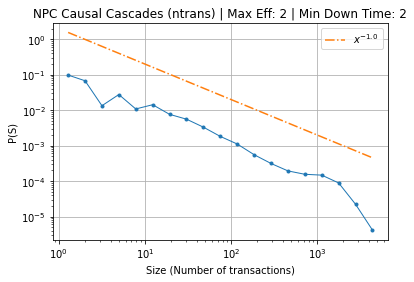

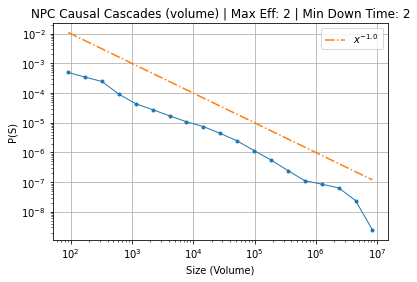

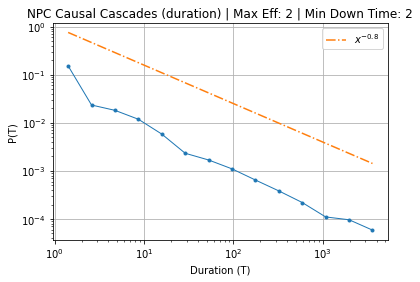

In [15]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

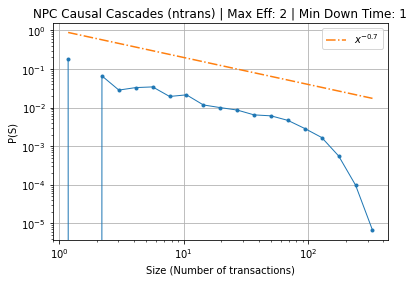

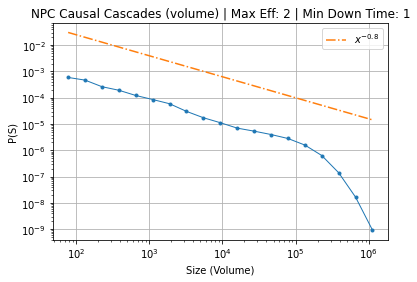

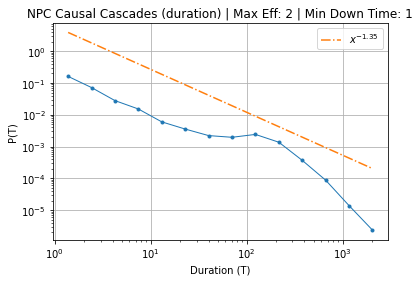

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

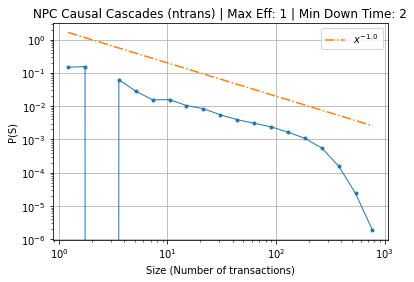

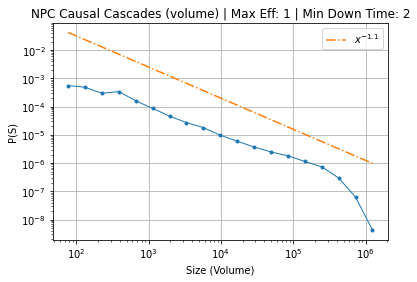

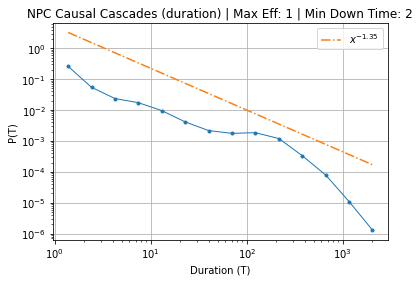

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

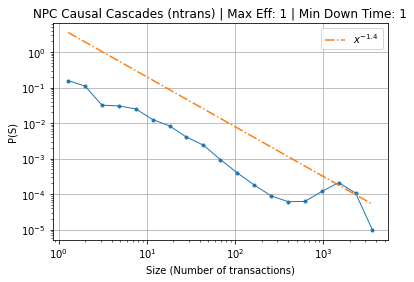

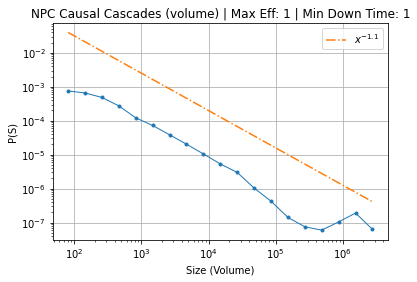

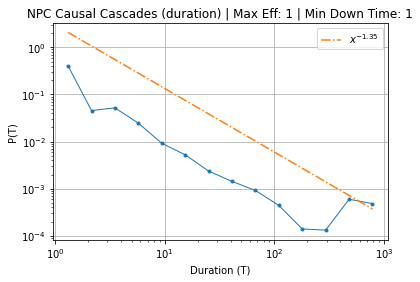

In [12]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_500_7200_100_5_10_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_500_7200_100_5_10_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_500_7200_100_5_10_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
